In [46]:
#Import the necessary libraries and the load the k-Means dataset
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

iris = load_iris()
X_iris = iris.data

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist = mnist.data
y_mnist = mnist.target

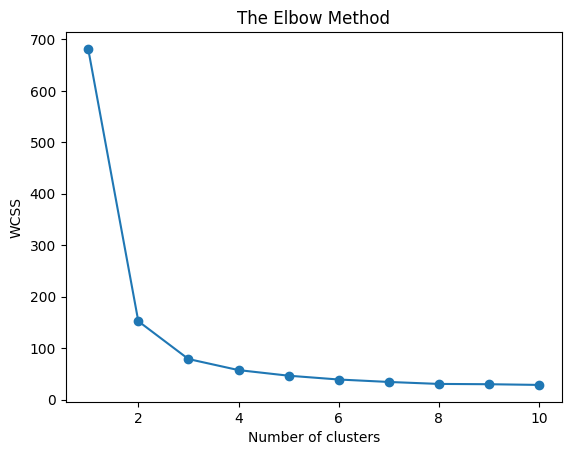

In [47]:
#Compute Within-Cluster Sum of Sqaures for each cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_iris)
    wcss.append(kmeans.inertia_)

#Plot the results and graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
#Split into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

#Apply StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
#Apply PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

start = time.time()
logistic_pca = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_pca.fit(X_train_pca, y_train)
y_pred_pca = logistic_pca.predict(X_test_pca)
end = time.time()
time_pca = end - start

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA:", acc_pca)
print("Time taken with PCA:", time_pca)

#USE Logistic regression without PCA and take time
start = time.time()
logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic.fit(X_train, y_train)
y_pred_no_pca = logistic.predict(X_test)
end = time.time()
time_no_pca = end - start

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Accuracy without PCA:", acc_no_pca)
print("Time taken without PCA:", time_no_pca)

Accuracy with PCA: 0.922
Time taken with PCA: 54.69614887237549
Accuracy without PCA: 0.9153571428571429
Time taken without PCA: 64.31387853622437


In [45]:
#Compare Final Information
print("-------------FINAL COMPARISONS-------------")
print("Accuracy with PCA:", acc_pca)
print("Accuracy without PCA:", acc_no_pca)
print("Time with PCA:", time_pca)
print("Time without PCA:", time_no_pca)
print(f"Time saved with PCA: {time_no_pca - time_pca:.2f} seconds")

-------------FINAL COMPARISONS-------------
Accuracy with PCA: 0.922
Accuracy without PCA: 0.9153571428571429
Time with PCA: 54.69614887237549
Time without PCA: 64.31387853622437
Time saved with PCA: 9.62 seconds
